In [2]:
import pandas as pd

# 병합된 CSV 파일 경로
merged_csv_path = "/home/ssh010214/BDP/merged_data_with_university.csv"

# CSV 파일 로드
try:
    merged_df = pd.read_csv(merged_csv_path)
    
    # 데이터프레임의 row 수 확인
    row_count = merged_df.shape[0]
    print(f"병합된 데이터셋의 총 행(Row) 수: {row_count}")
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {merged_csv_path}")
except Exception as e:
    print(f"오류 발생: {e}")

병합된 데이터셋의 총 행(Row) 수: 115817


In [3]:
import pandas as pd
    
# 각 피처별 null 값의 개수 확인
null_counts = merged_df.isnull().sum()
    
# 각 피처별 null 값 출력
print("각 피처별 null 값 개수:")
print(null_counts)

각 피처별 null 값 개수:
대학교 이름         0
가게 이름          0
가게 평균 평점       0
리뷰어 리뷰수        0
리뷰 텍스트      4027
리뷰 날짜          0
가게 방문수         0
태그들         7238
dtype: int64


In [4]:
# 데이터프레임의 상위 10개 행 출력
print(merged_df['리뷰 텍스트'].head(20))

0     서울권에 있는 카페 거의 다가봤는데 개인적으로 1등 1티어입니다 친구들 회기오면 무...
1     분위기도 좋은데 커피가 너무 맛있어요. 디카페인커피는 경험상 일반 아메리카노보다 맛...
2     오랫만에 왔는데 여전히 커피도 맛있네요!! 시나몬카푸치노였는데 은은한 시나몬향과 살...
3     한번 와보고 싶었던 곳인데 드디어 와봅니다.\n판나코타 궁금했는데 이건 1인 1개 ...
4     오늘 1일.2카페!\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 ...
5                          주4회이상 방문하는데 라떼가 정말 맛있어요👍👍👍👍👍
6     회기역 디저트 맛집이에요💗 판나코타는 처음 먹어봤는데 달달한 생크림 맛의 푸딩과 딸...
7     컴투레스트가 회기 유일의 감성카페였던 2018년도부터 종종 들르던 사람입니다. 오늘...
8        맛도 분위기도 너무 매력적인곳이네요 >.<\n디져트도 느므 맛나고요\n인생 맛집 ♡
9                                                   NaN
10                                          인생쑥크림....졸맛
11                         점심호사ㅡ짧게나마ㅡ나에게하사한쉼. 역시플랫화이트bb
12    푸딩이 탱글탱글 맛있어요-\n딸기의 달달함과 새콤함이 잘어울려요-\n커피는 쓰고 탄...
13                              커피가 넘 맛있어요~~ 회기동 커피 맛집🌿
14    카페쇼때 봤어서 찾아가봤는더\n매장도 아늑하고\n커피 특히 드립이 아주 맛나니 추천...
15               회기에서 좋아하는 카페입니다.\n커피도 맛있고 판나코타도 맛있습니다.
16    필터 커피 맛있구요 판나코타도 너무너무 맛있어요! 저희 어머니 커피 마니아이시구 저...
17                                              

In [5]:
import re

# 이모티콘 제거 함수 정의
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # 감정 이모지
        u"\U0001F300-\U0001F5FF"  # 기호 및 물체 이모지
        u"\U0001F680-\U0001F6FF"  # 교통 및 기계 이모지
        u"\U0001F700-\U0001F77F"  # 기타 이모지
        u"\U0001F780-\U0001F7FF"  # 더 많은 기타 이모지
        u"\U0001F800-\U0001F8FF"  # 추가 범위
        u"\U0001F900-\U0001F9FF"  # 제스처, 스포츠 이모지
        u"\U0001FA00-\U0001FA6F"  # 오브젝트 및 심볼
        u"\U0001FA70-\U0001FAFF"  # 추가 심볼
        u"\u2600-\u26FF"          # 기타 기호
        u"\u2700-\u27BF"          # 문자 기호
        "]+", 
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# '리뷰 텍스트' 컬럼에서 이모티콘 제거
merged_df['리뷰 텍스트'] = merged_df['리뷰 텍스트'].astype(str).apply(remove_emojis)

# 결과 확인
print(merged_df['리뷰 텍스트'].head(20))

0     서울권에 있는 카페 거의 다가봤는데 개인적으로 1등 1티어입니다 친구들 회기오면 무...
1     분위기도 좋은데 커피가 너무 맛있어요. 디카페인커피는 경험상 일반 아메리카노보다 맛...
2     오랫만에 왔는데 여전히 커피도 맛있네요!! 시나몬카푸치노였는데 은은한 시나몬향과 살...
3     한번 와보고 싶었던 곳인데 드디어 와봅니다.\n판나코타 궁금했는데 이건 1인 1개 ...
4     오늘 1일.2카페!\n동생이 경희대 근처 커피집 다 이쁘고 맛나다고 ㅋ\n지나가다 ...
5                               주4회이상 방문하는데 라떼가 정말 맛있어요
6     회기역 디저트 맛집이에요 판나코타는 처음 먹어봤는데 달달한 생크림 맛의 푸딩과 딸기...
7     컴투레스트가 회기 유일의 감성카페였던 2018년도부터 종종 들르던 사람입니다. 오늘...
8         맛도 분위기도 너무 매력적인곳이네요 >.<\n디져트도 느므 맛나고요\n인생 맛집 
9                                                   nan
10                                          인생쑥크림....졸맛
11                         점심호사ㅡ짧게나마ㅡ나에게하사한쉼. 역시플랫화이트bb
12    푸딩이 탱글탱글 맛있어요-\n딸기의 달달함과 새콤함이 잘어울려요-\n커피는 쓰고 탄...
13                               커피가 넘 맛있어요~~ 회기동 커피 맛집
14    카페쇼때 봤어서 찾아가봤는더\n매장도 아늑하고\n커피 특히 드립이 아주 맛나니 추천...
15               회기에서 좋아하는 카페입니다.\n커피도 맛있고 판나코타도 맛있습니다.
16    필터 커피 맛있구요 판나코타도 너무너무 맛있어요! 저희 어머니 커피 마니아이시구 저...
17                                              

In [6]:
# 이모티콘이 남아있는 행 찾기
def contains_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # 감정 이모지
        u"\U0001F300-\U0001F5FF"  # 기호 및 물체 이모지
        u"\U0001F680-\U0001F6FF"  # 교통 및 기계 이모지
        u"\U0001F700-\U0001F77F"  # 기타 이모지
        u"\U0001F780-\U0001F7FF"  # 더 많은 기타 이모지
        u"\U0001F800-\U0001F8FF"  # 추가 범위
        u"\U0001F900-\U0001F9FF"  # 제스처, 스포츠 이모지
        u"\U0001FA00-\U0001FA6F"  # 오브젝트 및 심볼
        u"\U0001FA70-\U0001FAFF"  # 추가 심볼
        u"\u2600-\u26FF"          # 기타 기호
        u"\u2700-\u27BF"          # 문자 기호
        "]+", 
        flags=re.UNICODE
    )
    return bool(emoji_pattern.search(text))

# 이모티콘이 남아있는 행 필터링
emoji_rows = merged_df[merged_df['리뷰 텍스트'].astype(str).apply(contains_emojis)]

# 결과 출력
print(emoji_rows)

Empty DataFrame
Columns: [대학교 이름, 가게 이름, 가게 평균 평점, 리뷰어 리뷰수, 리뷰 텍스트, 리뷰 날짜, 가게 방문수, 태그들]
Index: []


In [7]:
# Null 및 빈 문자열 처리
merged_df['리뷰 텍스트'] = merged_df['리뷰 텍스트'].replace('', '리뷰 없음')  # 빈 문자열 처리
merged_df['리뷰 텍스트'] = merged_df['리뷰 텍스트'].fillna('리뷰 없음')      # NaN 처리

In [8]:
# null 및 빈 문자열 확인
print((merged_df['리뷰 텍스트'] == '').sum())  # 빈 문자열 확인
print(merged_df['리뷰 텍스트'].isna().sum())  # NaN 확인

0
0


In [9]:
# '태그들' 컬럼의 NaN(null) 값을 "태그 없음"으로 채우기
merged_df['태그들'] = merged_df['태그들'].fillna('태그 없음')

# 확인
print(merged_df['태그들'].isna().sum())  # null 값이 제거되었는지 확인


0


In [10]:
import pandas as pd
    
# 각 피처별 null 값의 개수 확인
null_counts = merged_df.isnull().sum()
    
# 각 피처별 null 값 출력
print("각 피처별 null 값 개수:")
print(null_counts)

각 피처별 null 값 개수:
대학교 이름      0
가게 이름       0
가게 평균 평점    0
리뷰어 리뷰수     0
리뷰 텍스트      0
리뷰 날짜       0
가게 방문수      0
태그들         0
dtype: int64


In [18]:
# 필요한 라이브러리 불러오기
from konlpy.tag import Okt
from collections import Counter
import requests

# 불용어 리스트 다운로드
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/master/stopwords-ko.txt"
response = requests.get(url)
stopwords = response.text.split("\n")  # 불용어 리스트 로드

# 형태소 분석기 선언
okt = Okt()

# 대학교별 단어 빈도 분석 함수 (Top 50 추출)
def get_top_50_words_by_university(df, text_column, university_column):
    result = {}
    
    # 대학별로 데이터 그룹화
    for university, group in df.groupby(university_column):
        # 해당 대학의 모든 리뷰 텍스트 합치기
        text = " ".join(group[text_column].dropna())
        
        # 형태소 분석 후 명사만 추출
        tokens = okt.nouns(text)
        
        # 불용어 제거
        tokens = [word for word in tokens if word not in stopwords and len(word) > 1]
        
        # 단어 빈도 계산
        word_freq = Counter(tokens)
        
        # 상위 50개 단어 추출
        result[university] = word_freq.most_common(50)
    
    return result

# 함수 실행
university_top_50_words = get_top_50_words_by_university(merged_df, '리뷰 텍스트', '대학교 이름')

# 결과 출력
for university, words in university_top_50_words.items():
    print(f"대학교: {university}")
    print("상위 50 단어:", words)
    print()

대학교: 가톨릭대학교
상위 50 단어: [('커피', 178), ('사장', 174), ('카페', 144), ('디저트', 104), ('방문', 100), ('자주', 91), ('분위기', 87), ('라떼', 87), ('진짜', 79), ('음료', 79), ('케이크', 76), ('가격', 66), ('메뉴', 66), ('가성', 66), ('밀크', 63), ('주문', 57), ('매장', 57), ('아이스크림', 56), ('맛집', 51), ('소금', 48), ('정말', 46), ('음식', 46), ('초코', 44), ('친구', 42), ('인테리어', 42), ('샌드위치', 40), ('항상', 38), ('최고', 38), ('크림', 37), ('역곡', 37), ('종류', 36), ('추천', 36), ('쿠키', 31), ('오늘', 30), ('직원', 30), ('이용', 30), ('달달', 29), ('처음', 29), ('딸기', 28), ('스콘', 28), ('직접', 27), ('마카롱', 26), ('아메리카노', 25), ('리뷰', 25), ('근처', 24), ('완전', 24), ('학교', 23), ('기분', 22), ('이드', 21), ('동네', 21)]

대학교: 강서대학교
상위 50 단어: [('커피', 498), ('사장', 308), ('케이크', 247), ('주문', 170), ('라떼', 150), ('매장', 146), ('소금', 142), ('카페', 140), ('정말', 124), ('방문', 123), ('자주', 114), ('진짜', 109), ('음료', 96), ('디저트', 91), ('원두', 79), ('오늘', 78), ('맛집', 76), ('크림', 69), ('추천', 67), ('분위기', 67), ('동네', 63), ('아이스크림', 63), ('치즈', 63), ('메뉴', 61), ('최고', 60), ('가격', 60), ('포장'

In [74]:
custom_stopwords = [
    '진짜', '정말', '항상', '완전', '최고', '기분', '생각', '추천', '직접', '이용',
    '커피', '카페', '디저트', '사장', '방문', '음료', '매장', '메뉴', '가격', '종류',
    '건대', '홍대', '서울대', '명지대', '경희대', '한성대', '중앙대', '왕십리', '성수',
    '친구', '사람', '자리', '사진', '오늘', '학교', '학생', '가게', '가성', '공차', '공간',
    '국민대', '근처', '대화', '동네', '리뷰', '맛집', '보고', '서비스', '스터디', '선생님', 
    '삼육대', '안산', '안성', '아침', '직원', '조치원', '주문', '처음', '포장', '회사',
    '인테리어', '음악', '느낌', '자주', '역곡', '강서', '합심', '성신여대', '광운대', '충무로',
    '경의선', '신촌', '이대', '올림픽', '회기', '숭실대', '영통', '모현', 
    
]



# 기존 불용어 리스트에 사용자 정의 불용어 추가
stopwords = stopwords + custom_stopwords

# 데이터 재분석
university_top_words_filtered = get_top_50_words_by_university(merged_df, '리뷰 텍스트', '대학교 이름')

# 결과 출력 (각 대학별 상위 10개 단어만)
for university, words in university_top_words_filtered.items():
    print(f"대학교: {university}")
    print("상위 10 단어:", words[:10])  # 상위 10개 단어만 출력
    print()

대학교: 가톨릭대학교
상위 10 단어: [('밀크', 63), ('아이스크림', 56), ('소금', 48), ('음식', 46), ('초코', 44), ('샌드위치', 40), ('크림', 37), ('달달', 29), ('딸기', 28), ('스콘', 28)]

대학교: 강서대학교
상위 10 단어: [('소금', 142), ('원두', 79), ('크림', 69), ('아이스크림', 63), ('치즈', 63), ('초코', 51), ('애플파이', 51), ('샐러드', 45), ('케익', 43), ('번창', 39)]

대학교: 건국대학교
상위 10 단어: [('크림', 272), ('빙수', 160), ('공부', 155), ('초코', 154), ('딸기', 153), ('달달', 150), ('티라미수', 130), ('크리스마스', 129), ('스콘', 119), ('밀크', 115)]

대학교: 경기대학교 서울캠퍼스
상위 10 단어: [('크림', 108), ('샌드위치', 98), ('치아바타', 95), ('원두', 86), ('밀크', 82), ('아메리카노', 70), ('식빵', 60), ('요거트', 54), ('에스프레소', 53), ('할인', 52)]

대학교: 경희대학교 국제캠퍼스
상위 10 단어: [('베이글', 497), ('크림', 200), ('빙수', 167), ('치즈', 163), ('샌드위치', 129), ('브런치', 120), ('주차', 104), ('마카롱', 101), ('선물', 88), ('음식', 85)]

대학교: 경희대학교 서울캠퍼스
상위 10 단어: [('크림', 206), ('타르트', 193), ('소금', 161), ('요거트', 148), ('달달', 139), ('공부', 114), ('치즈', 111), ('그릭', 100), ('지하', 100), ('과일', 95)]

대학교: 고려대학교 서울캠퍼스
상위 10 단어: [('크림', 283), ('딸기', 205), ('스콘',

In [64]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='NanumGothic')  # 'NanumGothic'을 기본 폰트로 설정

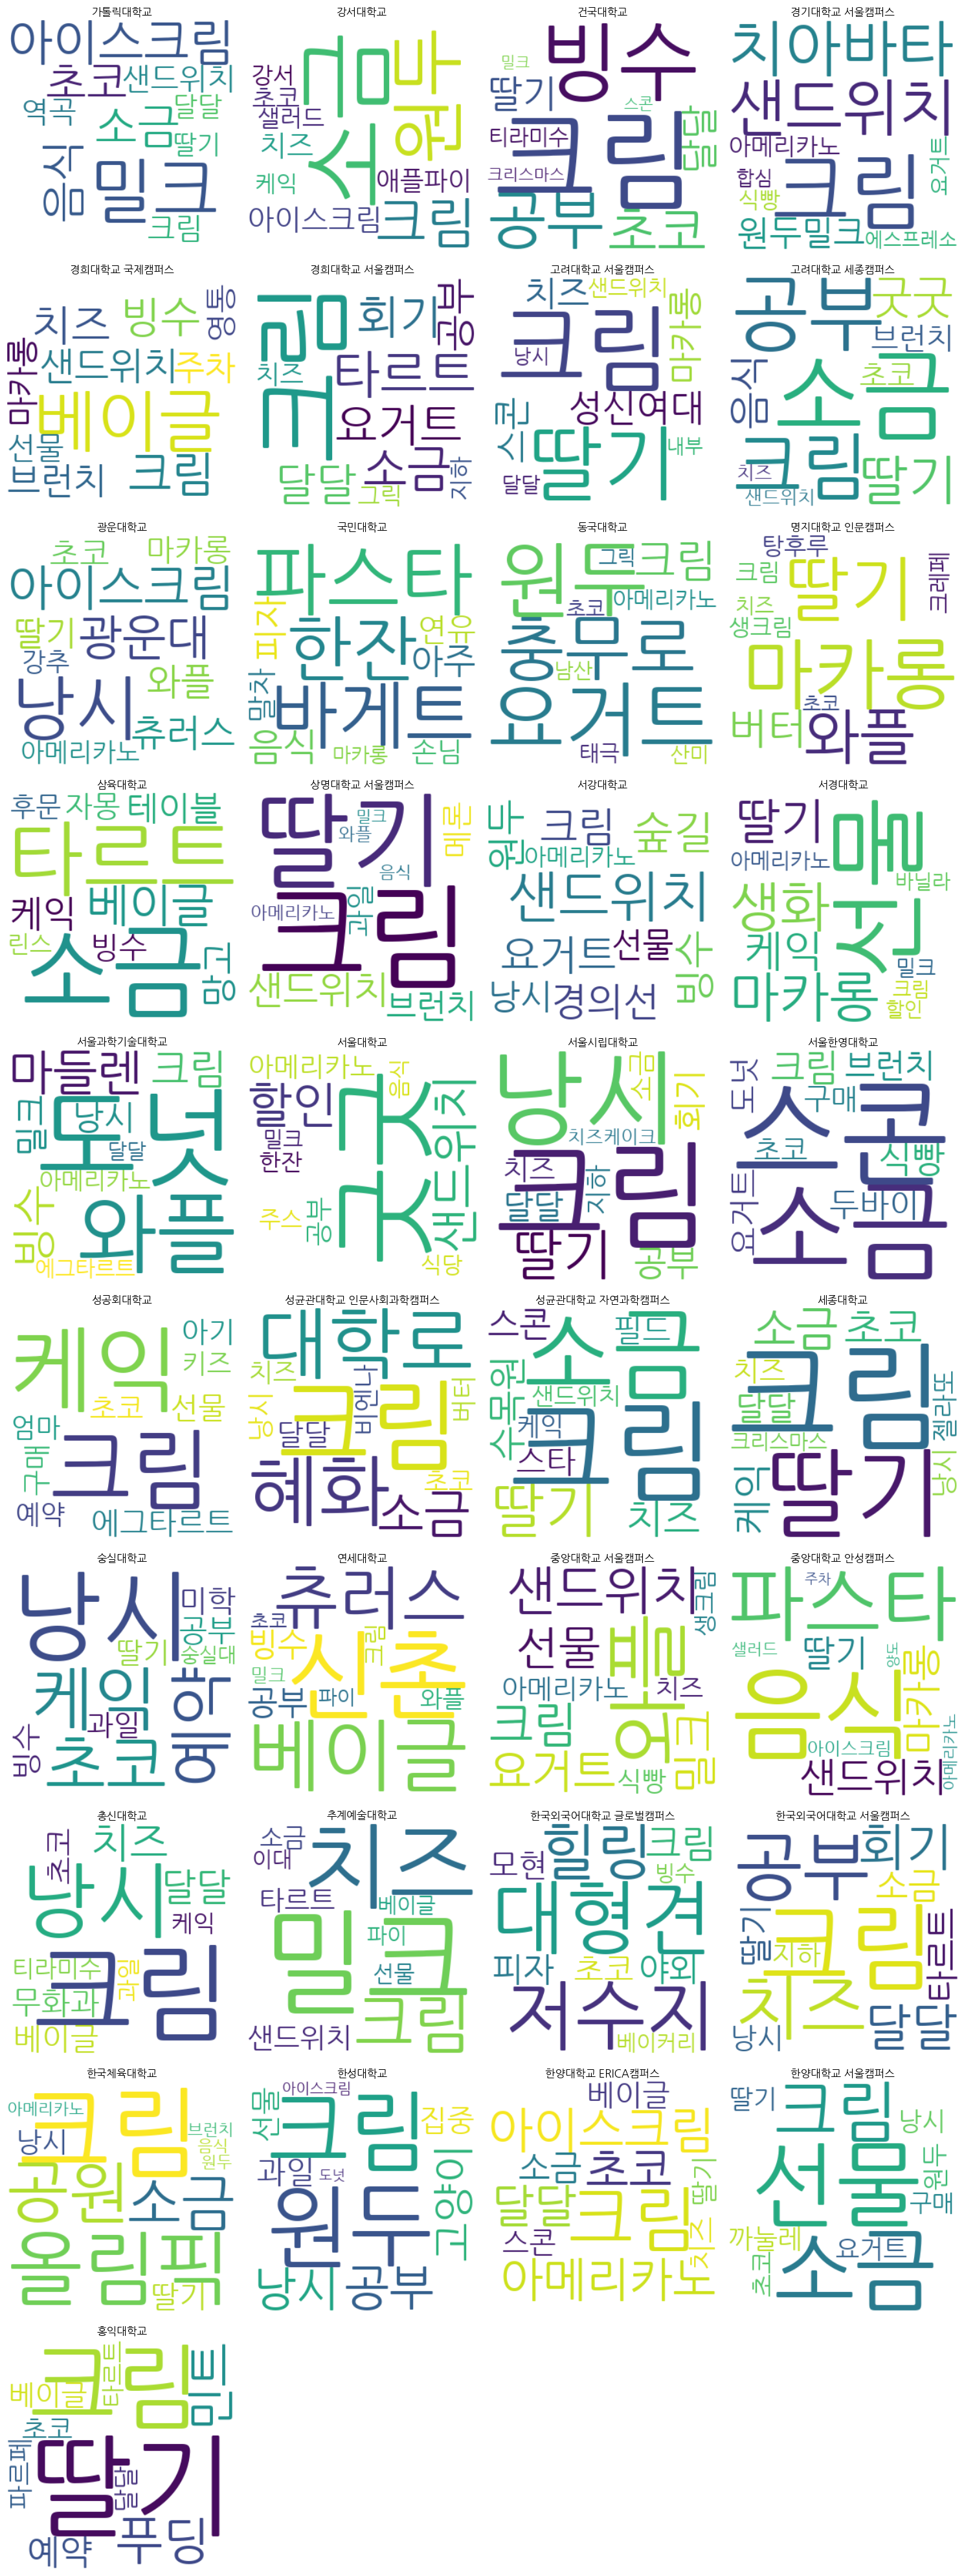

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 한글 폰트 경로

# 플롯 행/열 설정 (예: 4개씩 한 줄에 표시)
n_cols = 4
n_rows = (len(university_top_words_filtered) + n_cols - 1) // n_cols  # 행 계산

# 전체 플롯 크기 설정
plt.figure(figsize=(15, n_rows * 4))

# 대학별 WordCloud 생성 및 출력
for idx, (university, words) in enumerate(university_top_words_filtered.items(), 1):
    # 단어 데이터 딕셔너리 생성 (상위 10개만 사용)
    word_freq = {word: freq for word, freq in words[:10]}
    
    # WordCloud 생성
    wordcloud = WordCloud(
        font_path=font_path,
        background_color="white",
        width=300,
        height=300,
        max_words=10
    ).generate_from_frequencies(word_freq)
    
    # 서브플롯 추가
    plt.subplot(n_rows, n_cols, idx)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(university, fontsize=12)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()


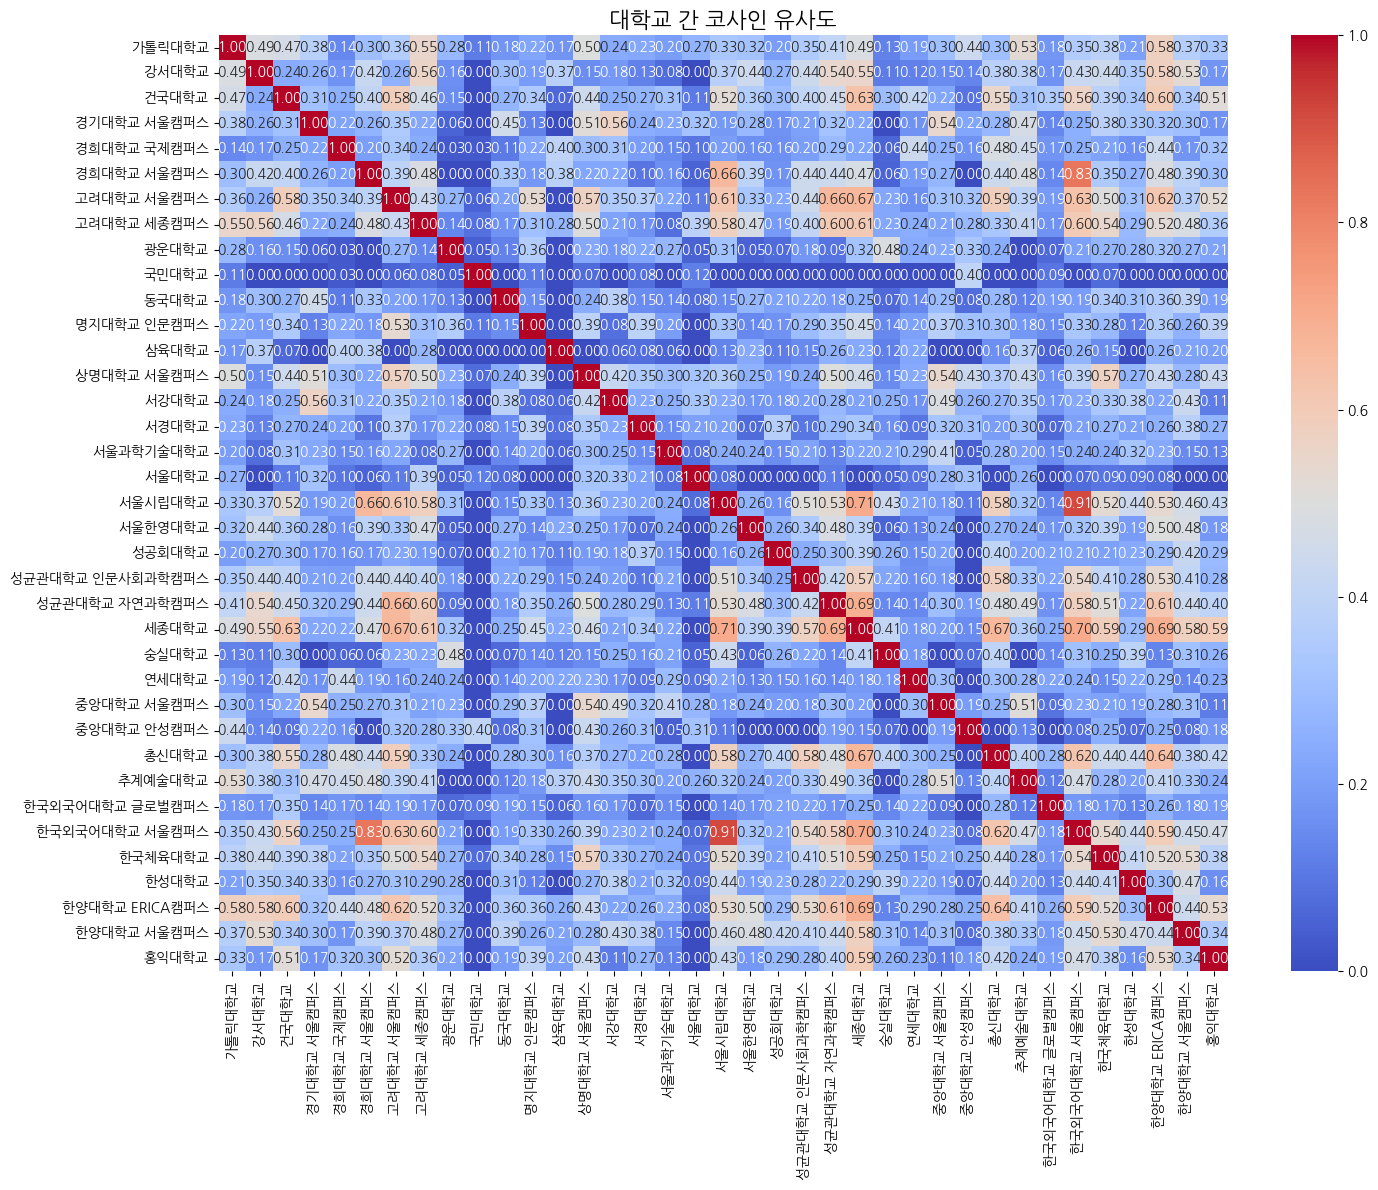

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 대학별 단어와 빈도를 기반으로 행렬 생성
university_words_matrix = {}

for university, words in university_top_words_filtered.items():
    word_freq = dict(words[:10])  # 상위 10개 단어만 사용
    university_words_matrix[university] = word_freq

# 모든 단어를 벡터화 (대학별 단어 벡터 생성)
all_words = list({word for words in university_words_matrix.values() for word in words.keys()})
word_index = {word: idx for idx, word in enumerate(all_words)}

# 대학별 단어 빈도 행렬
university_vectors = []
for university, words in university_words_matrix.items():
    vector = np.zeros(len(all_words))
    for word, freq in words.items():
        if word in word_index:
            vector[word_index[word]] = freq
    university_vectors.append(vector)

# 코사인 유사도 계산
cosine_sim_matrix = cosine_similarity(university_vectors)

# 데이터프레임으로 변환 (대학교 이름을 인덱스와 컬럼으로 사용)
universities = list(university_words_matrix.keys())
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=universities, columns=universities)

# 시각화 (코사인 유사도 히트맵)
plt.figure(figsize=(15, 12))
sns.heatmap(cosine_sim_df, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("대학교 간 코사인 유사도", fontsize=16)
plt.tight_layout()
plt.show()

# 결과 데이터프레임 저장 (원하는 경우 파일로 저장)
cosine_sim_df.to_csv("university_cosine_similarity.csv", index=True)


/tmp/ipykernel_3793343/2469977412.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/packages/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


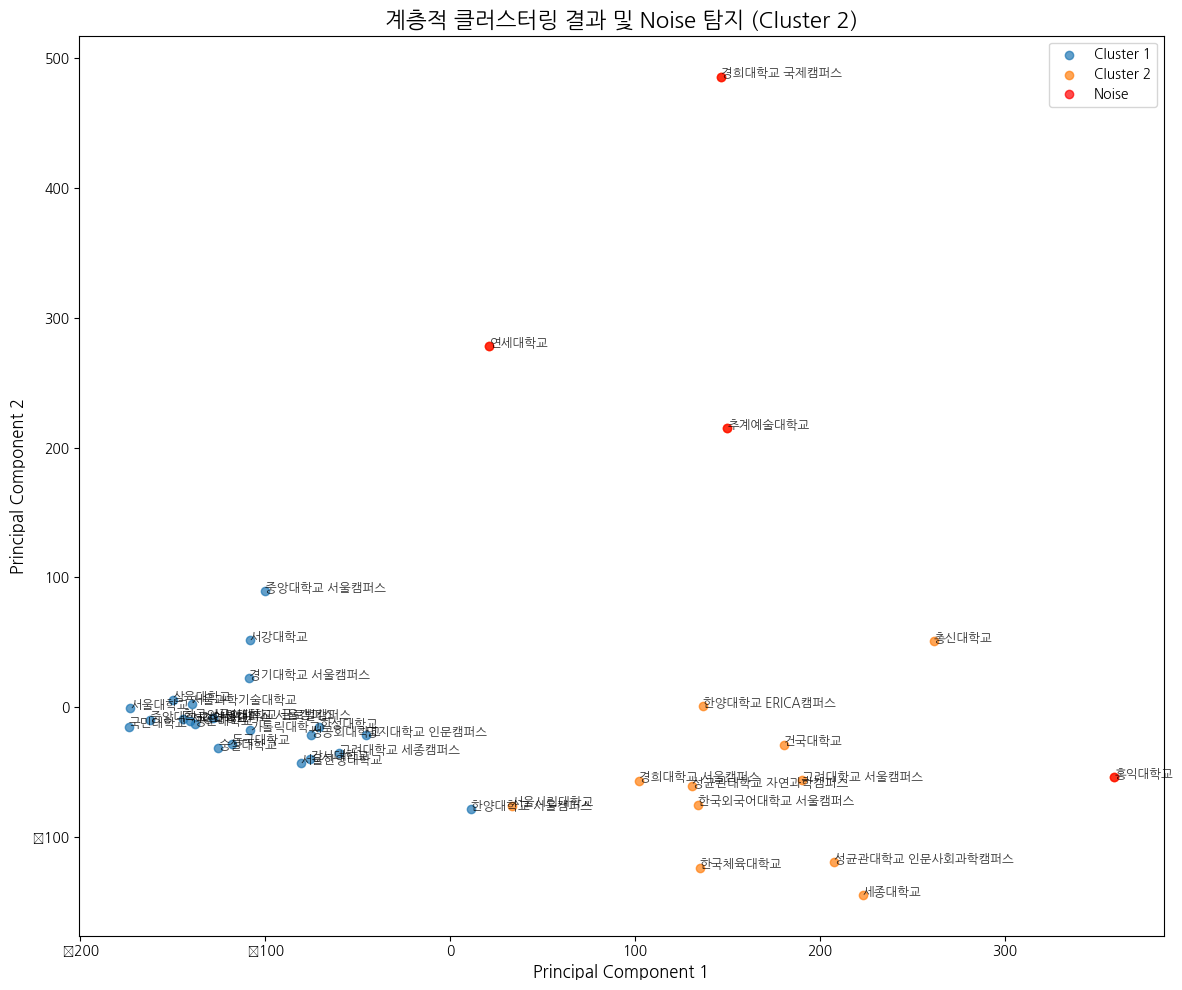

In [71]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 대학별 단어와 빈도를 기반으로 행렬 생성
university_words_matrix = {}

for university, words in university_top_words_filtered.items():
    word_freq = dict(words[:10])  # 상위 10개 단어만 사용
    university_words_matrix[university] = word_freq

# 모든 단어를 벡터화 (대학별 단어 벡터 생성)
all_words = list({word for words in university_words_matrix.values() for word in words.keys()})
word_index = {word: idx for idx, word in enumerate(all_words)}

# 대학별 단어 빈도 행렬
university_vectors = []
for university, words in university_words_matrix.items():
    vector = np.zeros(len(all_words))
    for word, freq in words.items():
        if word in word_index:
            vector[word_index[word]] = freq
    university_vectors.append(vector)

# 계층적 클러스터링 수행
linkage_matrix = linkage(university_vectors, method='ward')  # Ward 방법 사용
clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')  # 2개의 클러스터로 나누기

# PCA로 차원 축소
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(university_vectors)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters
reduced_df['University'] = list(university_words_matrix.keys())

# 클러스터 중심 계산 (각 클러스터의 평균 위치)
cluster_centers = reduced_df.groupby('Cluster')[['PC1', 'PC2']].mean().values

# 데이터와 클러스터 중심 간 거리 계산
distances = cdist(reduced_df[['PC1', 'PC2']], cluster_centers, metric='euclidean')
reduced_df['Distance_to_Center'] = distances.min(axis=1)  # 각 데이터의 최소 거리

# 거리 기준 설정을 더 강화
threshold = reduced_df['Distance_to_Center'].mean() + 1.0 * reduced_df['Distance_to_Center'].std()
reduced_df['Is_Noise'] = reduced_df['Distance_to_Center'] > threshold


# 시각화
plt.figure(figsize=(12, 10))
for cluster in reduced_df['Cluster'].unique():
    cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

# Noise 데이터 표시
noise_data = reduced_df[reduced_df['Is_Noise']]
plt.scatter(noise_data['PC1'], noise_data['PC2'], color='red', label='Noise', alpha=0.7)

# 대학교 이름 표시
for i in range(len(reduced_df)):
    plt.text(reduced_df['PC1'][i], reduced_df['PC2'][i], reduced_df['University'][i], fontsize=9, alpha=0.8)

plt.title("계층적 클러스터링 결과 및 Noise 탐지 (Cluster 2)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
# Cluster 1과 Cluster 2에 속한 대학교 데이터 필터링 및 출력
cluster_1_data = reduced_df[(reduced_df['Cluster'] == 1) & (~reduced_df['Is_Noise'])]
cluster_2_data = reduced_df[(reduced_df['Cluster'] == 2) & (~reduced_df['Is_Noise'])]

# 출력
print("Cluster 1에 속한 대학교:")
print(cluster_1_data[['University', 'Distance_to_Center']])

print("\nCluster 2에 속한 대학교:")
print(cluster_2_data[['University', 'Distance_to_Center']])

print("\nNoise로 식별된 대학교:")
print(noise_data[['University', 'Distance_to_Center']])


Cluster 1에 속한 대학교:
         University  Distance_to_Center
0            가톨릭대학교            4.791963
1             강서대학교           47.213231
3       경기대학교 서울캠퍼스           30.525716
7       고려대학교 세종캠퍼스           54.429667
8             광운대학교           32.171192
9             국민대학교           63.172565
10            동국대학교           16.837304
11      명지대학교 인문캠퍼스           66.849116
12            삼육대학교           43.636109
13      상명대학교 서울캠퍼스           18.104024
14            서강대학교           48.974042
15            서경대학교           30.496865
16        서울과학기술대학교           34.993766
17            서울대학교           63.438172
19          서울한영대학교           42.385850
20           성공회대학교           34.123472
24            숭실대학교           26.473954
26      중앙대학교 서울캠퍼스           97.789691
27      중앙대학교 안성캠퍼스           51.233318
30  한국외국어대학교 글로벌캠퍼스           33.909038
33            한성대학교           39.473790
35      한양대학교 서울캠퍼스          139.637938

Cluster 2에 속한 대학교:
          University  Distance_to_Center


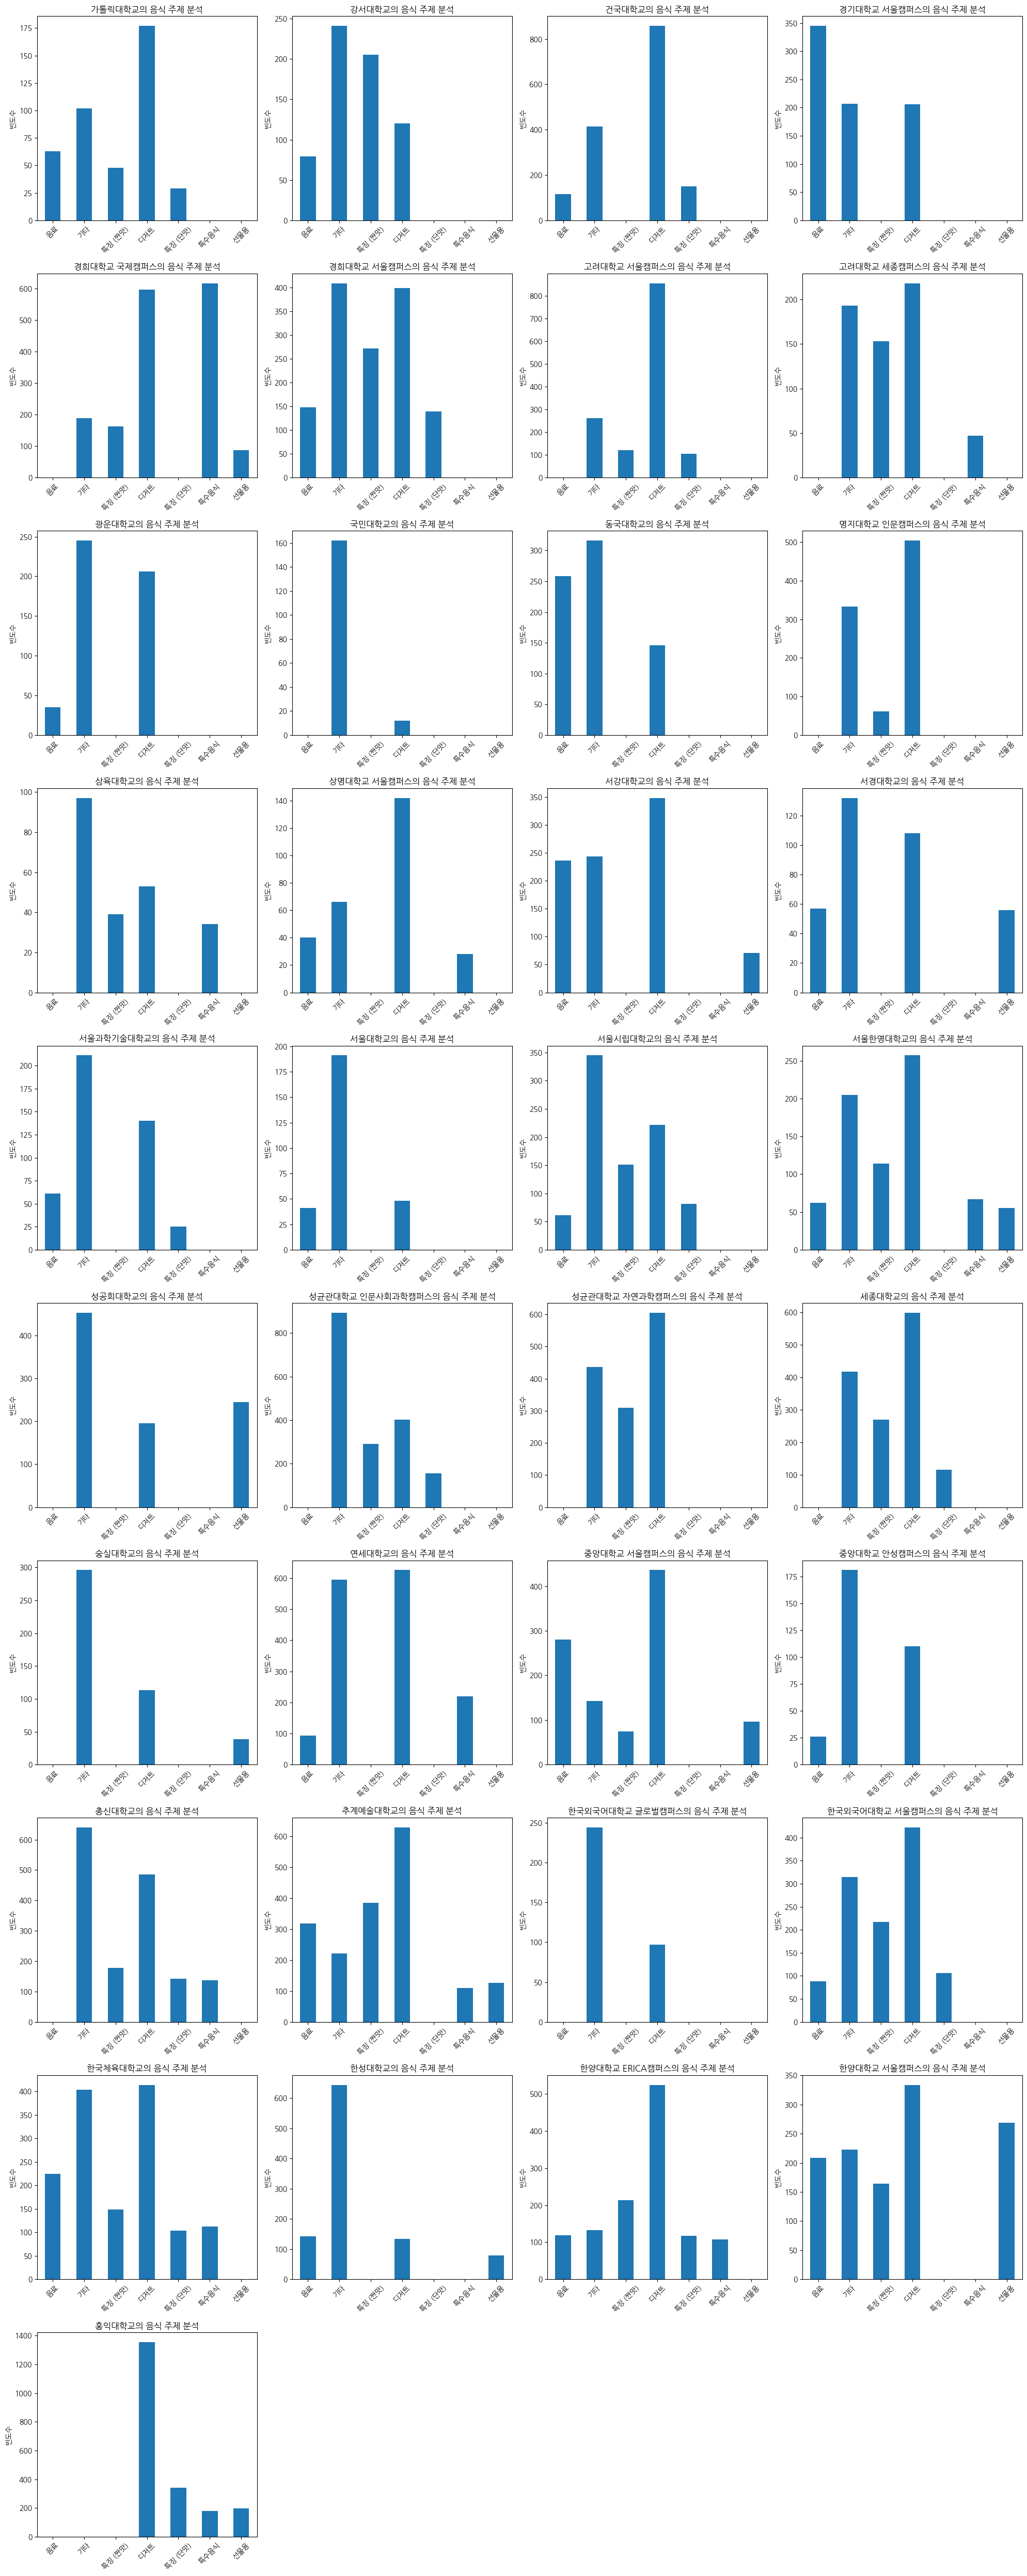

In [76]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd

# 음식 관련 단어 사전 정의
food_topics = {
    "디저트": ["크림", "초코", "딸기", "빙수", "샌드위치", "타르트", "스콘", "와플", "푸딩", "파르페", "마카롱"],
    "음료": ["아메리카노", "원두", "밀크", "요거트", "에스프레소"],
    "특징 (단맛)": ["달달", "민트", "초코"],
    "특징 (짠맛)": ["소금", "치즈"],
    "특수음식": ["타르트", "베이글", "샌드위치", "브런치"],
    "선물용": ["선물", "예약", "구매"],
}

# 대학교별 단어 분류
university_food_counts = defaultdict(Counter)

# 가상의 데이터셋을 university_top_words_filtered로 대체
# university_top_words_filtered = { '대학교1': [('단어', 빈도수), ...], '대학교2': ... }

for university, words in university_top_words_filtered.items():
    for word, freq in words[:10]:  # 상위 10개 단어만 사용
        assigned = False
        for topic, keywords in food_topics.items():
            if word in keywords:
                university_food_counts[university][topic] += freq
                assigned = True
                break
        if not assigned:  # 분류되지 않은 단어는 기타로 처리
            university_food_counts[university]["기타"] += freq

# 결과 데이터프레임 생성
university_food_df = pd.DataFrame(university_food_counts).fillna(0).T
university_food_df = university_food_df.astype(int)

# 플롯 행/열 설정
n_cols = 4
n_rows = (len(university_food_df) + n_cols - 1) // n_cols  # 행 계산

# 전체 플롯 크기 설정
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

# 대학교별 음식 주제 비중 시각화
for i, university in enumerate(university_food_df.index):
    topic_data = university_food_df.loc[university]
    ax = axes[i]
    topic_data.plot(kind="bar", ax=ax, title=f"{university}의 음식 주제 분석", ylabel="빈도수")
    ax.set_xticklabels(topic_data.index, rotation=45)
    ax.set_xlabel("")

# 남은 빈 플롯 숨기기
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()
